In [1]:
import pandas as pd
import os

In [2]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
print(data.shape)
print(test.shape)

(14993, 24)
(3972, 23)


In [5]:
category=["Type","Breed1","Breed2","Gender","Color1","Color2","Color3",
          "MaturitySize","FurLength","Vaccinated","Dewormed","Sterilized","Health","State"]
for i in category:
    data[i]=data[i].astype("category")
    test[i]=test[i].astype("category")
data["AdoptionSpeed"]=data["AdoptionSpeed"].astype("category")

In [6]:
data.isnull().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [7]:
#刪除：quantity

data.drop("Quantity",axis=1,inplace=True)
test.drop("Quantity",axis=1,inplace=True)

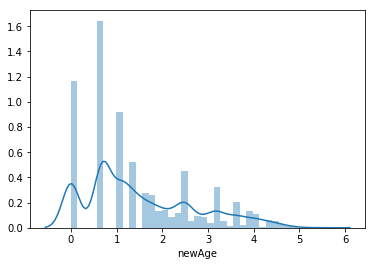

In [8]:
#age 處理
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
data["Age"]=data["Age"].replace(0,1)
test["Age"]=test["Age"].replace(0,1)
data["newAge"]=np.log(data["Age"])
test["newAge"]=np.log(test["Age"])


ax = sns.distplot(data['newAge'])

In [9]:
data.drop("Age",axis=1,inplace=True)
test.drop("Age",axis=1,inplace=True)

In [10]:
state_gdp = {
    41336: 116.679,
    41325: 40.596,
    41367: 23.02,
    41401: 190.075,
    41415: 5.984,
    41324: 37.274,
    41332: 42.389,
    41335: 52.452,
    41330: 67.629,
    41380: 5.642,
    41327: 81.284,
    41345: 80.167,
    41342: 121.414,
    41326: 280.698,
    41361: 32.270
}
state_population = {
    41336: 33.48283,
    41325: 19.47651,
    41367: 15.39601,
    41401: 16.74621,
    41415: 0.86908,
    41324: 8.21110,
    41332: 10.21064,
    41335: 15.00817,
    41330: 23.52743,
    41380: 2.31541,
    41327: 15.61383,
    41345: 32.06742,
    41342: 24.71140,
    41326: 54.62141,
    41361: 10.35977
}

data["state_gdp"] = data.State.map(state_gdp)
data["state_population"] = data.State.map(state_population)
test["state_gdp"] = test.State.map(state_gdp)
test["state_population"] = test.State.map(state_population)

data.drop("State",axis=1,inplace=True)
test.drop("State",axis=1,inplace=True)

# 每種寵物至少會被記錄到一種顏色，但是大部分的寵物不會被記錄到三種顏色

In [11]:
color=pd.read_csv("color_labels.csv")
color=color.set_index("ColorID")
color

,ColorName
ColorID,
1,Black
2,Brown
3,Golden
4,Yellow
5,Cream
6,Gray
7,White


In [12]:
data["Color1"].value_counts()

1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: Color1, dtype: int64

In [13]:
data["Color2"].value_counts()

0    4471
7    3438
2    3313
5    1128
6    1063
4     870
3     710
Name: Color2, dtype: int64

In [14]:
data["Color3"].value_counts()

0    10604
7     3221
5      417
6      378
4      198
3      175
Name: Color3, dtype: int64

# 如果寵物是混合品種，則breed2會有另外一個品種的類型，但是大部分的值都是None，代表資料中的寵物大都不是混合品種

In [15]:
(data["Breed2"].value_counts()/data.shape[0])[:5]

0      0.717802
307    0.115187
266    0.039952
265    0.021410
299    0.009204
Name: Breed2, dtype: float64

In [16]:
data.drop("Breed2",axis=1,inplace=True)
test.drop("Breed2",axis=1,inplace=True)

In [17]:
data.drop("PetID",axis=1,inplace=True)
test.drop("PetID",axis=1,inplace=True)

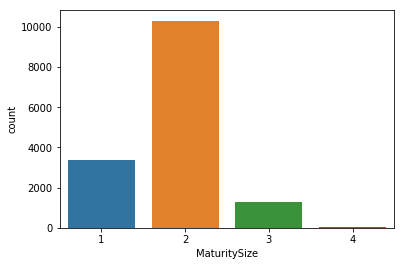

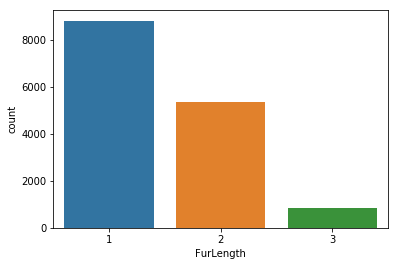

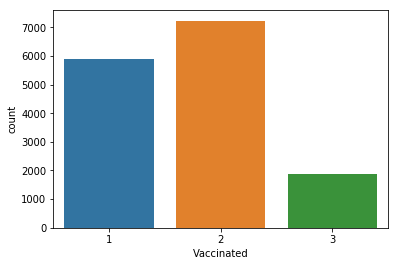

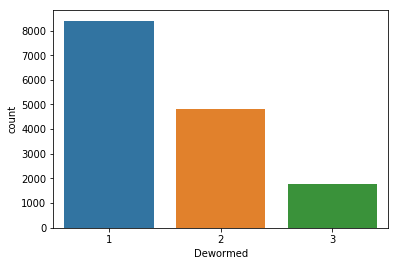

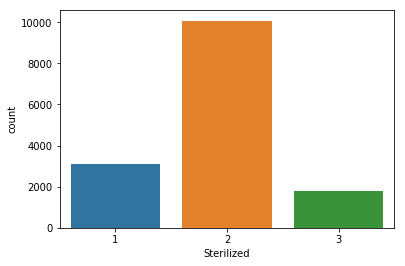

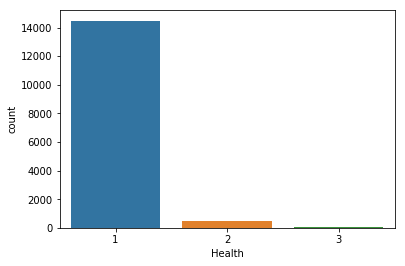

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plot=["MaturitySize","FurLength","Vaccinated","Dewormed","Sterilized","Health"]
for i in plot:
    sns.countplot(i, data=data)
    plt.show()

In [19]:
#Heath 2,3 可以合併成一類
#MaturitySize 3,4 也可以考慮合併成一類

In [20]:
data["Health"]=data["Health"].replace(3,2)
test["Health"]=test["Health"].replace(3,2)

In [21]:
data["MaturitySize"]=data["MaturitySize"].replace(4,3)
test["MaturitySize"]=test["MaturitySize"].replace(4,3)

In [22]:
data["Name"].isnull().sum()

1257

In [23]:
data["Name"]=data["Name"].replace(np.NaN,"No Name")
data["Name"].isnull().sum()

0

In [24]:
test["Name"]=test["Name"].replace(np.NaN,"No Name")

In [25]:
def transform(x):
    if "No Name" in x:
        return "0"
    else:
        return "1"
data["Name"]=data["Name"].apply(transform)
test["Name"]=test["Name"].apply(transform)

In [26]:
def transform(x):
    if x==0:
        return "0"
    else:
        return "1"
data["VideoAmt"]=data["VideoAmt"].apply(transform)
test["VideoAmt"]=test["VideoAmt"].apply(transform)

In [27]:
data["VideoAmt"].value_counts()

0    14419
1      574
Name: VideoAmt, dtype: int64

In [28]:
pd.DataFrame((list(data["RescuerID"])+list(test["RescuerID"])))[0].value_counts()[:11]

fa90fa5b1ee11c86938398b60abc32cb    459
aa66486163b6cbc25ea62a34b11c9b91    315
c00756f2bdd8fa88fc9f07a8309f7d5d    231
b53c34474d9e24574bcec6a3d3306a0d    228
62a25cadb85658be5275bd54a3b8c76d    162
ee2747ce26468ec44c7194e7d1d9dad9    156
1ead09ad20d7519c330a77341bb521f4    148
8019146babc11f5fd87ad8b7d530f374    135
95481e953f8aed9ec3d16fc4509537e8    134
b770bac0ca797cf1433c48a35d30c4cb    111
b16cc97cb1e9a5fac57889cd113f17ae    101
Name: 0, dtype: int64

In [29]:
id=pd.DataFrame((list(data["RescuerID"])+list(test["RescuerID"])))[0].value_counts()[:11].index

In [30]:
data["RescuerID"]= data['RescuerID'].apply(lambda i: i if i in id else 'others')

In [31]:
test["RescuerID"]= test['RescuerID'].apply(lambda i: i if i in id else 'others')

In [32]:
data["RescuerID"].value_counts()

others                              13359
fa90fa5b1ee11c86938398b60abc32cb      459
aa66486163b6cbc25ea62a34b11c9b91      315
c00756f2bdd8fa88fc9f07a8309f7d5d      231
b53c34474d9e24574bcec6a3d3306a0d      228
ee2747ce26468ec44c7194e7d1d9dad9      156
95481e953f8aed9ec3d16fc4509537e8      134
b770bac0ca797cf1433c48a35d30c4cb      111
Name: RescuerID, dtype: int64

In [33]:
data["RescuerID"]=data["RescuerID"].astype("category")
test["RescuerID"]=test["RescuerID"].astype("category")

In [34]:
data["Gender"]=data["Gender"].replace(3,np.nan)
test["Gender"]=test["Gender"].replace(3,np.nan)

In [35]:
data["Gender"].value_counts()

2    7277
1    5536
3       0
Name: Gender, dtype: int64

In [36]:
print("Gender = 2 的比例: ",7277/(7277+5536))

Gender = 2 的比例:  0.5679388121439163


In [37]:
data['Gender'] = data['Gender'].fillna(pd.Series(np.random.choice([2,1], p=[0.57, 0.43], size=len(data))))

In [38]:
test['Gender'] = test['Gender'].fillna(pd.Series(np.random.choice([2,1], p=[0.57, 0.43], size=len(test)))) 

In [39]:
data["Name"]=data["Name"].astype("category")
test["Name"]=test["Name"].astype("category")

# 接合處理過的Description 欄位資料

In [43]:
path=os.path.abspath('..')
description=pd.read_csv(path+"\\description\\train_tx.csv")

In [44]:
new=description[description.columns[25:75]]

In [45]:
new.shape

(14993, 50)

In [46]:
data.shape

(14993, 22)

In [47]:
newdata=pd.concat([data,new],axis=1)

In [48]:
newdata.head()

,Type,Name,Breed1,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,...,TSVD_40,TSVD_41,TSVD_42,TSVD_43,TSVD_44,TSVD_45,TSVD_46,TSVD_47,TSVD_48,TSVD_49
0,2,1,299,2,1,7,0,1,1,2,...,0.060692,-0.043978,0.143283,-0.022178,0.015564,-0.101111,0.071091,0.032453,0.009559,-0.001531
1,2,0,265,2,1,2,0,2,2,3,...,0.075180,-0.093830,0.045828,-0.106293,-0.071901,-0.034985,-0.041262,-0.035130,0.043572,0.115550
2,1,1,307,2,2,7,0,2,2,1,...,-0.155044,0.087081,-0.119396,0.062214,-0.060009,-0.115283,0.088948,0.092785,-0.078323,-0.073280
3,1,1,307,1,1,2,0,2,1,1,...,0.000798,0.004033,0.038207,-0.046823,-0.004154,-0.006705,-0.007481,-0.093493,-0.081669,-0.128809
4,1,1,307,2,1,0,0,2,1,2,...,-0.051045,-0.002960,0.013174,-0.004390,-0.053053,-0.123951,0.004156,-0.020637,0.071993,-0.005746


In [49]:
newdata.drop("Description",axis=1,inplace=True)

In [50]:
newdata.columns

Index(['Type', 'Name', 'Breed1', 'Gender', 'Color1', 'Color2', 'Color3',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Fee', 'RescuerID', 'VideoAmt', 'PhotoAmt', 'AdoptionSpeed',
       'newAge', 'state_gdp', 'state_population', 'TSVD_0', 'TSVD_1', 'TSVD_2',
       'TSVD_3', 'TSVD_4', 'TSVD_5', 'TSVD_6', 'TSVD_7', 'TSVD_8', 'TSVD_9',
       'TSVD_10', 'TSVD_11', 'TSVD_12', 'TSVD_13', 'TSVD_14', 'TSVD_15',
       'TSVD_16', 'TSVD_17', 'TSVD_18', 'TSVD_19', 'TSVD_20', 'TSVD_21',
       'TSVD_22', 'TSVD_23', 'TSVD_24', 'TSVD_25', 'TSVD_26', 'TSVD_27',
       'TSVD_28', 'TSVD_29', 'TSVD_30', 'TSVD_31', 'TSVD_32', 'TSVD_33',
       'TSVD_34', 'TSVD_35', 'TSVD_36', 'TSVD_37', 'TSVD_38', 'TSVD_39',
       'TSVD_40', 'TSVD_41', 'TSVD_42', 'TSVD_43', 'TSVD_44', 'TSVD_45',
       'TSVD_46', 'TSVD_47', 'TSVD_48', 'TSVD_49'],
      dtype='object')

In [1]:
newdata.to_csv("data.csv", index=False)